In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#load the data
df = pd.read_csv("TCS_stock_history.csv")

In [3]:
df.head(3)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-08-12,28.794172,29.742206,28.794172,29.519140,212976,0.0,0.0
1,2002-08-13,29.556316,30.030333,28.905705,29.119476,153576,0.0,0.0
2,2002-08-14,29.184536,29.184536,26.563503,27.111877,822776,0.0,0.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4463 entries, 0 to 4462
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          4463 non-null   object 
 1   Open          4463 non-null   float64
 2   High          4463 non-null   float64
 3   Low           4463 non-null   float64
 4   Close         4463 non-null   float64
 5   Volume        4463 non-null   int64  
 6   Dividends     4463 non-null   float64
 7   Stock Splits  4463 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 279.1+ KB


In [7]:
df.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,4463.000000,4463.000000,4463.000000,4463.000000,4.463000e+03,4463.000000,4463.000000
mean,866.936239,876.675013,856.653850,866.537398,3.537876e+06,0.071533,0.001344
std,829.905368,838.267104,821.233477,829.611313,3.273531e+06,0.965401,0.051842
min,24.146938,27.102587,24.146938,26.377609,0.000000e+00,0.000000,0.000000
25%,188.951782,191.571816,185.979417,188.594620,1.860959e+06,0.000000,0.000000
50%,530.907530,534.751639,525.616849,529.713257,2.757742e+06,0.000000,0.000000
75%,1156.462421,1165.815854,1143.622800,1154.784851,4.278625e+06,0.000000,0.000000
max,3930.000000,3981.750000,3892.100098,3954.550049,8.806715e+07,40.000000,2.000000


In [8]:
#Converting Date column

df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')

In [11]:
#Checking missing values
df.isna().sum()

Date            0
Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64

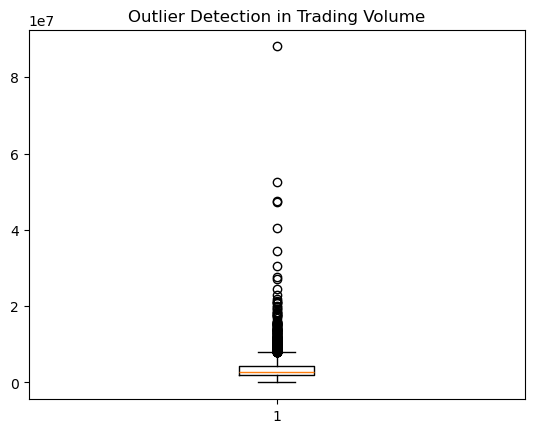

In [12]:
#Outlier check (Volume)

plt.figure()
plt.boxplot(df['Volume'])
plt.title("Outlier Detection in Trading Volume")
plt.show()

### Outlier Handling Decision

The extreme trading volume observed is not treated as a data error.
In financial time series, such spikes usually correspond to major
market events like earnings releases or institutional activity.

Removing these values would eliminate important market signals,
therefore the outlier is retained for analysis.


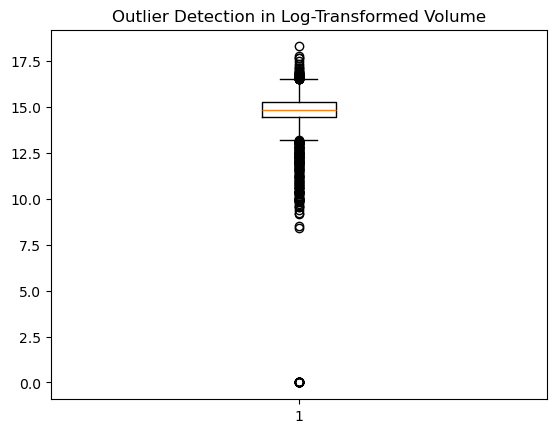

In [14]:
#Using Log transformation
df['Log_Volume'] = np.log1p(df['Volume'])

plt.figure()
plt.boxplot(df['Log_Volume'])
plt.title("Outlier Detection in Log-Transformed Volume")
plt.show()

## Insight: 
   Log transformation reduces skewness while preserving extreme market events.

## Exploratory Data Analysis (EDA)

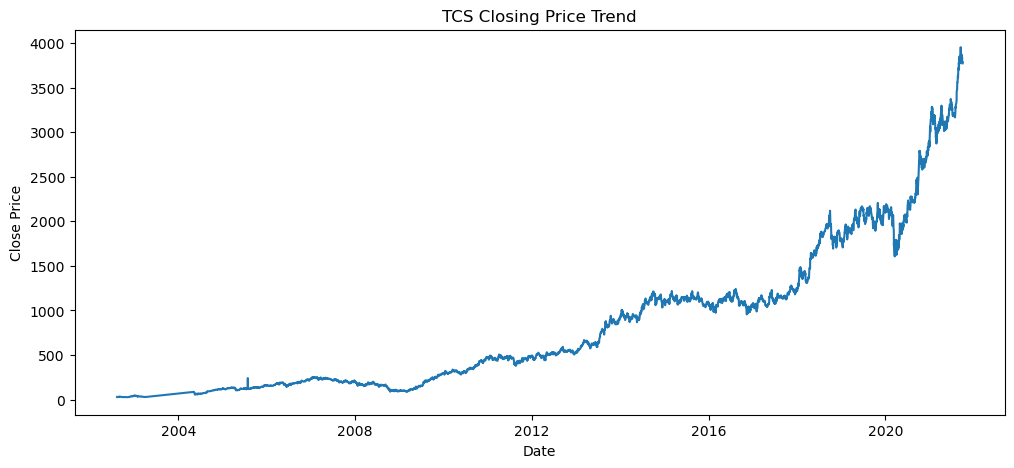

In [17]:
#Price Trend Analysis

plt.figure(figsize=(12,5))
plt.plot(df['Date'], df['Close'])
plt.title("TCS Closing Price Trend")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.show()

## Insight:
  TCS shows a long tern upward trend, refelcting strong market confidence.

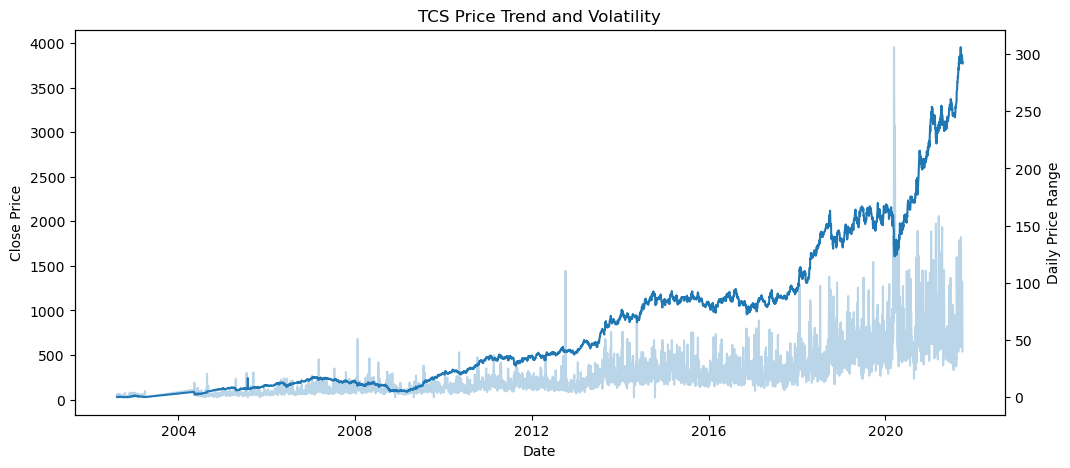

In [32]:
#Volatility Trend 

df['Daily_Range'] = df['High'] - df['Low']

fig, ax1 = plt.subplots(figsize=(12,5))

ax1.plot(df['Date'], df['Close'], label='Close Price')
ax1.set_xlabel('Date')
ax1.set_ylabel('Close Price')

ax2 = ax1.twinx()
ax2.plot(df['Date'], df['Daily_Range'], alpha=0.3)
ax2.set_ylabel('Daily Price Range')

plt.title("TCS Price Trend and Volatility")
plt.show()


## Insight:
  The closing price shows a strong long-term upward trend,
  while spikes in daily range highlight periods of increased volatility.

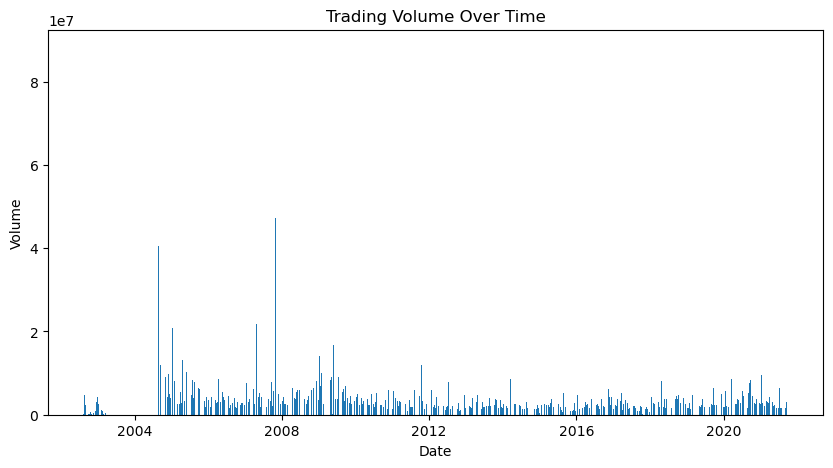

In [31]:
#Volume analysis

plt.figure(figsize=(10,5))
plt.bar(df['Date'], df['Volume'])
plt.title("Trading Volume Over Time")
plt.xlabel("Date")
plt.ylabel("Volume")
plt.show()

## Insight:
  Volume spikes align with significant price movements, confirming trend strength.

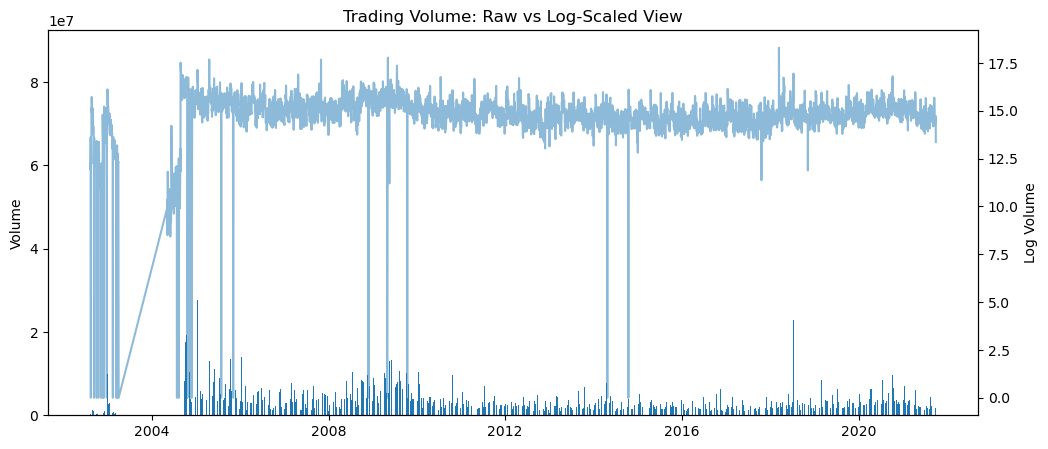

In [28]:
#Raw vs Log-Scaled View of Volume
fig, ax1 = plt.subplots(figsize=(12,5))

ax1.bar(df['Date'], df['Volume'])
ax1.set_ylabel('Volume')

ax2 = ax1.twinx()
ax2.plot(df['Date'], df['Log_Volume'], alpha=0.5)
ax2.set_ylabel('Log Volume')

plt.title("Trading Volume: Raw vs Log-Scaled View")
plt.show()

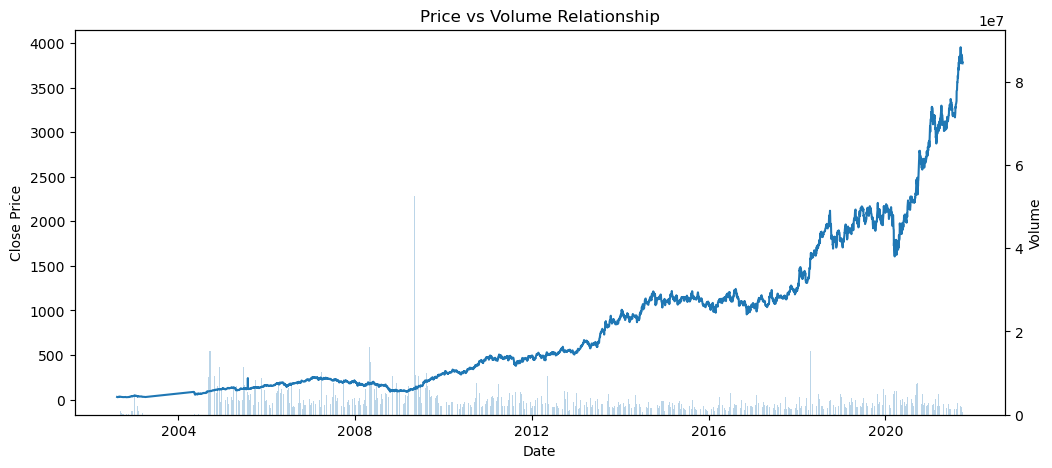

In [33]:
#Price vs Volume Relation

fig, ax1 = plt.subplots(figsize=(12,5))

ax1.set_xlabel('Date')
ax1.set_ylabel('Close Price')
ax1.plot(df['Date'], df['Close'])

ax2 = ax1.twinx()
ax2.set_ylabel('Volume')
ax2.bar(df['Date'], df['Volume'], alpha=0.3)

plt.title("Price vs Volume Relationship")
plt.show()


## Insight:
  High trading volume often accompanies sharp price movements.

In [40]:
3#Moving Average Analysis
df['Signal'] = 0
df.loc[df['MA_20'] > df['MA_50'], 'Signal'] = 1
df['Crossover'] = df['Signal'].diff()


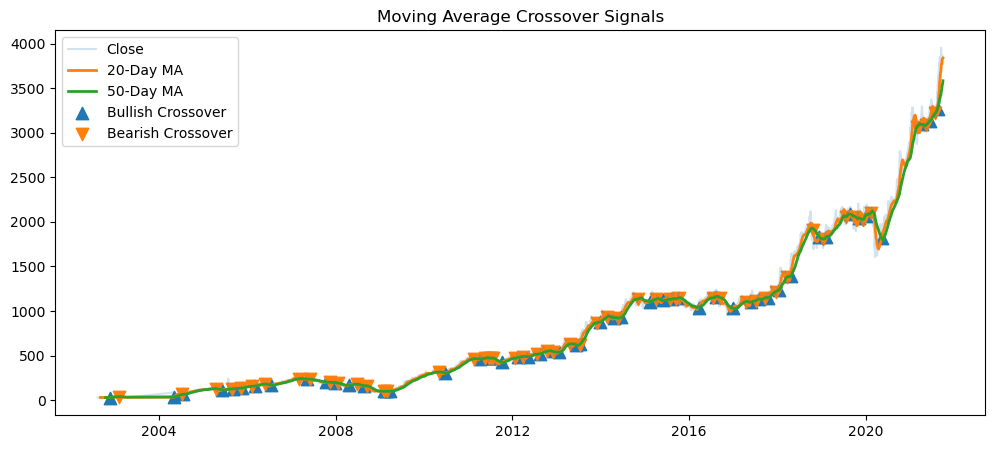

In [41]:
plt.figure(figsize=(12,5))

plt.plot(df['Date'], df['Close'], alpha=0.2, label='Close')
plt.plot(df['Date'], df['MA_20'], linewidth=2, label='20-Day MA')
plt.plot(df['Date'], df['MA_50'], linewidth=2, label='50-Day MA')

# Golden Cross
plt.scatter(
    df[df['Crossover'] == 1]['Date'],
    df[df['Crossover'] == 1]['MA_20'],
    marker='^',
    s=80,
    label='Bullish Crossover'
)

# Death Cross
plt.scatter(
    df[df['Crossover'] == -1]['Date'],
    df[df['Crossover'] == -1]['MA_20'],
    marker='v',
    s=80,
    label='Bearish Crossover'
)

plt.title("Moving Average Crossover Signals")
plt.legend()
plt.show()


## Insight:
  Bullish crossover signals generally precede strong upward price movements,
while bearish crossovers signal consolidation or corrections.


## Feature Enginerring

In [44]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['DayOfWeek'] = df['Date'].dt.dayofweek

df['Lag_Close'] = df['Close'].shift(1)
df.dropna(inplace=True)

## Insight:
   Lag features help capture market memory for better predictions.

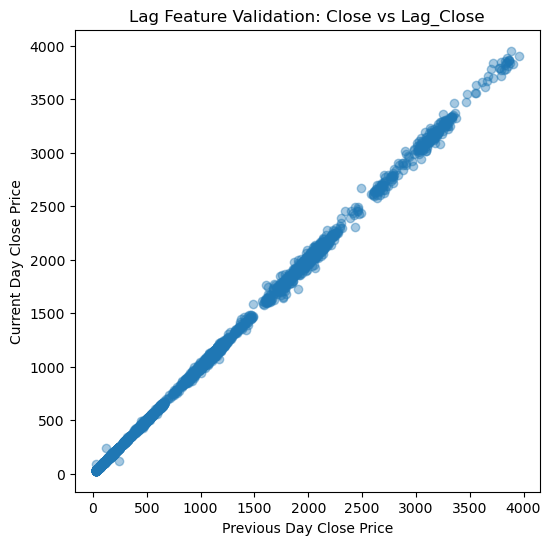

In [47]:
#Todays's Close vs Yesterday's Close

plt.figure(figsize=(6,6))
plt.scatter(df['Lag_Close'], df['Close'], alpha=0.4)
plt.xlabel("Previous Day Close Price")
plt.ylabel("Current Day Close Price")
plt.title("Lag Feature Validation: Close vs Lag_Close")
plt.show()


## Insight:
   A strong linear relationship between previous and current closing prices
confirms the usefulness of lag features for prediction.


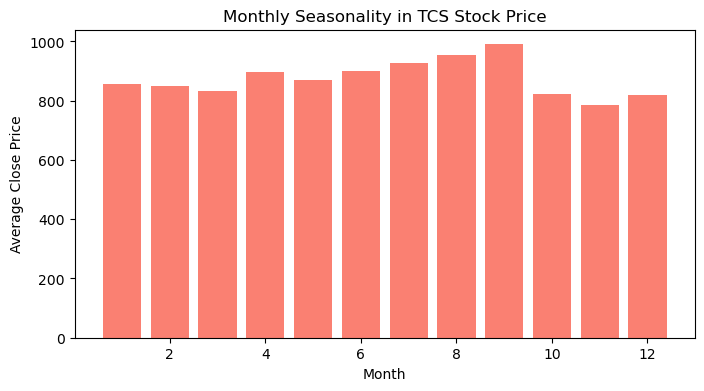

In [53]:
#Seasonality Analysis

monthly_avg = df.groupby('Month')['Close'].mean()

plt.figure(figsize=(8,4))
plt.bar(monthly_avg.index, monthly_avg.values, color='salmon')
plt.xlabel("Month")
plt.ylabel("Average Close Price")
plt.title("Monthly Seasonality in TCS Stock Price")
plt.show()


## Insight:
   Certain months consistently show higher average prices, indicating
possible seasonal trends in stock performance.


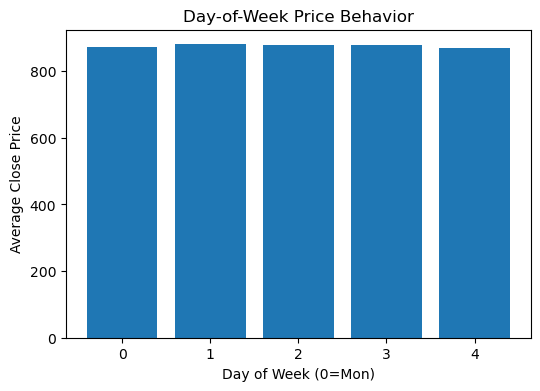

In [54]:
#Day-Of-Week trend Analysis

dow_avg = df.groupby('DayOfWeek')['Close'].mean()

plt.figure(figsize=(6,4))
plt.bar(dow_avg.index, dow_avg.values)
plt.xlabel("Day of Week (0=Mon)")
plt.ylabel("Average Close Price")
plt.title("Day-of-Week Price Behavior")
plt.show()


## Insight:
   Minor variations across weekdays suggest limited day-specific trading bias.

## Model Building - Linear Regression

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

features = ['Open','High','Low','Volume','Lag_Close']
X = df[features]
y = df['Close']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False
)

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

## Model Evaluation

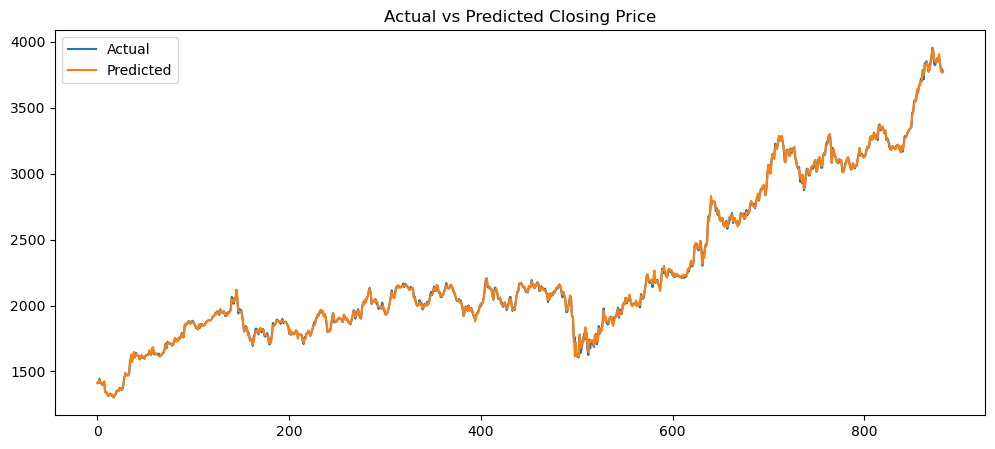

In [57]:
#Acctual vs Predicted(Line Chart)

y_pred = model.predict(X_test)

plt.figure(figsize=(12,5))
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.title("Actual vs Predicted Closing Price")
plt.show()


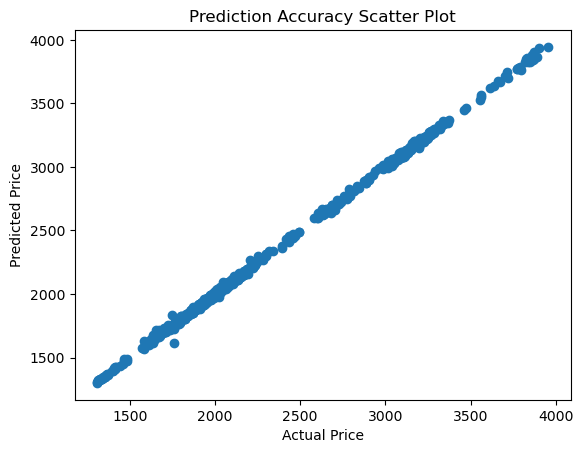

In [58]:
#Prediction Accuracy(Scatter Plot)

plt.figure()
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Prediction Accuracy Scatter Plot")
plt.show()


## Insight:
   The model captures overall trend but struggles during sudden volatility.

## Business Insights

### Key Insights
- TCS exhibits stable long-term growth.
- Volume confirms price movement strength.
- Moving averages indicate bullish momentum.

### Limitations
- Linear regression cannot capture market shocks.

### Future Scope
- Use LSTM or XGBoost for better forecasting accuracy.


In [ ]:
#save the file
df.to_csv("Cleaned_TCS_Stock_Price_Analysis.csv", index=False)